# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

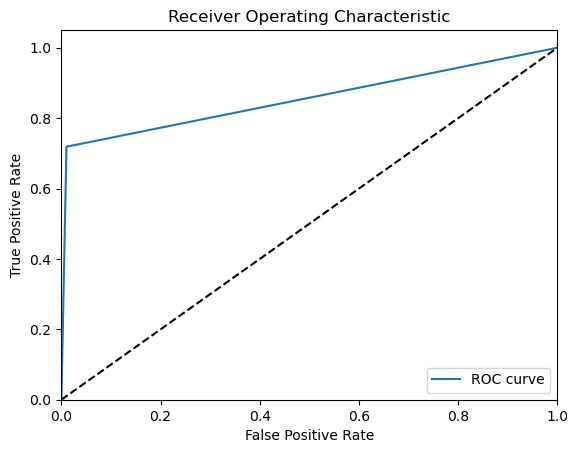

In [36]:
import matplotlib.pyplot as plt

# Calculate fpr, tpr using roc_curve()
# fpr, tpr, _ = roc_curve(y_test, y_pred)

# Now plot using matplotlib
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


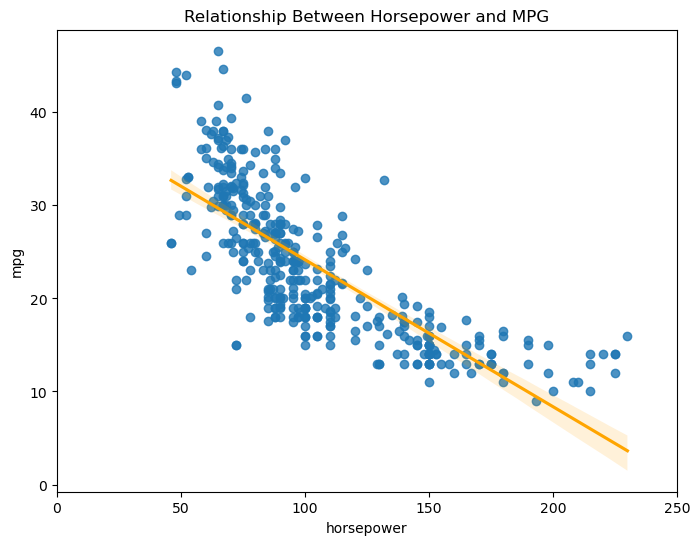

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
#call_on_students(1)

#### Answer: 

- This is a loss function. It shows error (as measured by RSS on the y-axis) and slope on the x-axis. We see that there is a parabolic relationship between error and slope. As slope increases, error decreases to a minimum point (around RSS = 9400 and slope = -0.157) and then increases. 


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

Draw small arrows from the top left going down to the minimum point. 

In [7]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- Step size is magnitude of each update that is applied to the parameters during each iteration of gradient descent. The learning rate is a hyperparmater that scales the gradient to result in the final step size. 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- Logistic regression is used for categorical targets.
- Logistic regression outputs the probability that an observation belongs to the positive class. (predicts the log odds of i -> odds -> probability -> 1 or 0 
- Logistic regression is used to predict categorical variables, whereas linear regression is used to predict continuous variables. This primary difference results in several other differences, such as logistic regression fitting a sigmoid function that is more suitable for discrete outcomes (where linear regression fits a line, plane, or hyperplane).
- Logistic regression is a parametric model.  


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- One benefit of logistic regression as compared to decision trees is that logistic regression is less prone to overfitting. 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target',axis=1)
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts()

target
0    195
1     67
Name: count, dtype: int64

#### Answer:

- There are 67 positive cases and 195 negative cases.


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 


#### Part 3: How accurate would that baseline be on test data?


In [18]:
# Code to find the answer


#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
# call_on_students(1)

#### Answer:

- 


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [20]:
# call_on_students(1)

In [21]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
model = LogisticRegression(random_state=42)
logreg = model.fit(X_train, y_train)

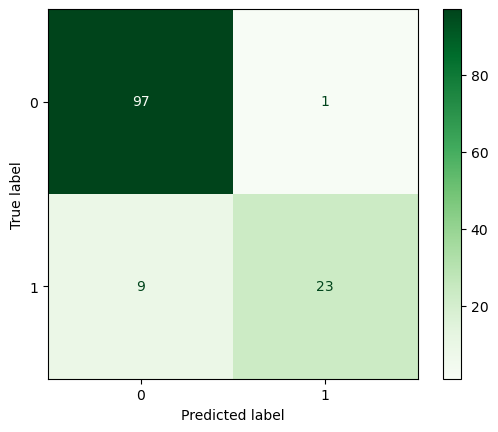

In [22]:
# Plot a confusion matrix on the test data
y_pred = model.predict(X_test)
con_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(con_mat)
disp.plot(cmap=plt.cm.Greens)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [23]:
# call_on_students(1)

In [24]:
# Accuracy 
# TP + TN / All
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print((30+81)/(81+17+2+30))

0.9230769230769231
0.8538461538461538


In [25]:
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))
print(30/(30+17))

0.9583333333333334
0.6382978723404256


In [26]:
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))
print(30/(32))

0.71875
0.9375


In [27]:
# F1-Score #2*pr/p+r
from sklearn.metrics import f1_score
p_plus_r = precision_score(y_test, y_pred) + recall_score(y_test, y_pred)
pr = precision_score(y_test, y_pred) * recall_score(y_test, y_pred)

print(f1_score(y_test, y_pred))
print((2*pr)/p_plus_r)

0.8214285714285714
0.8214285714285714


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [28]:
# call_on_students(1)

In [35]:
# Calculate roc-auc
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9811862244897959

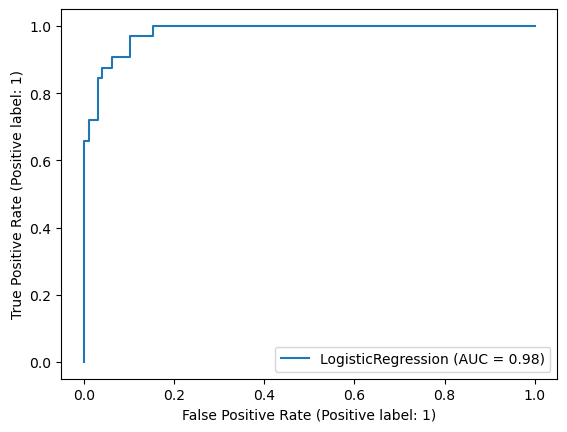

In [30]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- 


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [ ]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

In [ ]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

In [ ]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Version 1 does a better job because the gini scores in the leaves are closer to zero. 


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [ ]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)

# Training the two trees on different columns
dt.fit(X_train, y_train)

In [ ]:
# Plot a confusion matrix on the test data
#y_pred = dt.predict(X_test)
disp = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
#disp.plot(cmap=plt.cm.Greens)

In [ ]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
#roc_curve(dt, X_test, y_test, ax=ax)
#roc_curve(logreg, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logistic regression outperforms as evidenced by a high AUC. 
